In [1]:
import ipynb
import ipynb.fs.full.model_builder as model_builder

# Questions to be Answered
   * Higher square footage increases home sale price 

   * Having a porch increases home sale price

   * Having a beachfront or lakefront increases home sale price

   * The presence of a nuisance (power lines, traffic noise, airport noise) decreases home sale price

## Method
1. Create a base model with data that our question is testing
2. Identify variables that we believe are important, anlyze them to see if they fit into model function, seperate them into continuous and categorical variables
3. Analyze results looking at Adjusted R-squared, histogram of residuals, q-q plot, and a heatmap.

## Our Model Function

* Pulling data: Gather data from King County website and combine them with SQL then choose parameters for housing price

* Creating a Base Function: Isolate variables trying to test and test against our dependent variable

* Choosing continuous and categorical variables and combining data: Choose continuous variables to isolate from database and create separate columns for each category from chosen categorical variables

* Performing Linear Regression: Create a regression with chosen dependent variable and all remaining variables \

* Analyzing data: Find columns with high p-values and flag them. Drop one column for two highly correlated variable

* Displaying Results: Show R-squared, coefficients of all variables, histogram of residuals, Q-Q plot, and residual plot






    

## Pulling Data

We created a SQl query to combine all data based on a unique house pin values. We only used data for house prices between 200,000 and 2,500,000. We deemed that houses outside these parameters to not be representatibe of the overall King County housing market. Taking into consideration homes only inside these parameter allows us to create a model most representative for the majority of homes. 

## Creating a Base Model

We Identified variables idicating total feet of home, the presence of a porch, having a waterfront, and the prescense of nuisances. We then created a dataframe with only those variables and perform linear regression against the dependent variable of price. The R-squared value is 0.342. The residuals are not normally distributed, the residuals don't exhibit homoscedascity, and their is a low corellation between the features. It fails all four assumptions of linear regression


In [2]:
base_model, dep_var, base_features = model_builder.base_model()

base model summary
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     3691.
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:40:52   Log-Likelihood:            -4.0126e+05
No. Observations:               28441   AIC:                         8.025e+05
Df Residuals:                   28436   BIC:                         8.026e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           7.52e+05   

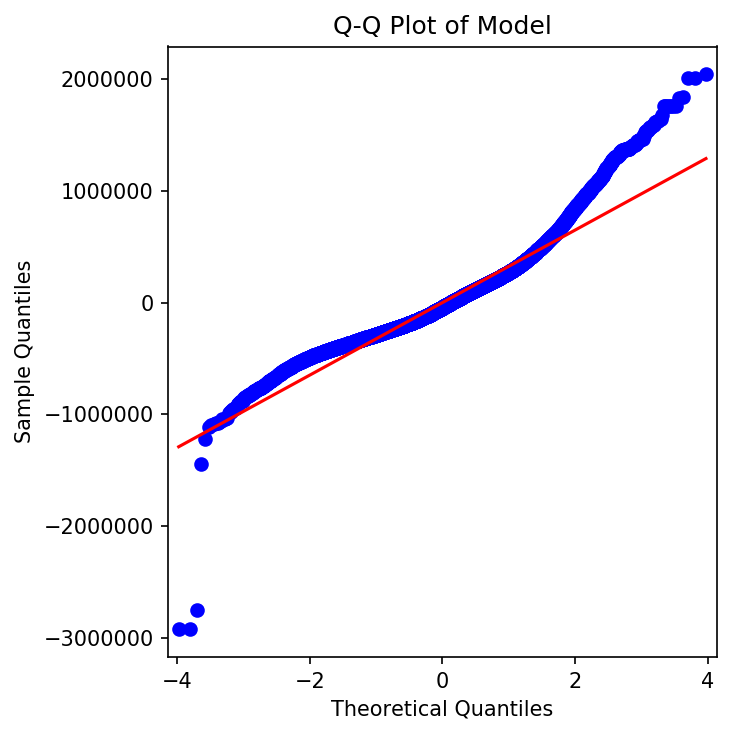

In [3]:
model_builder.qqplot(base_model)

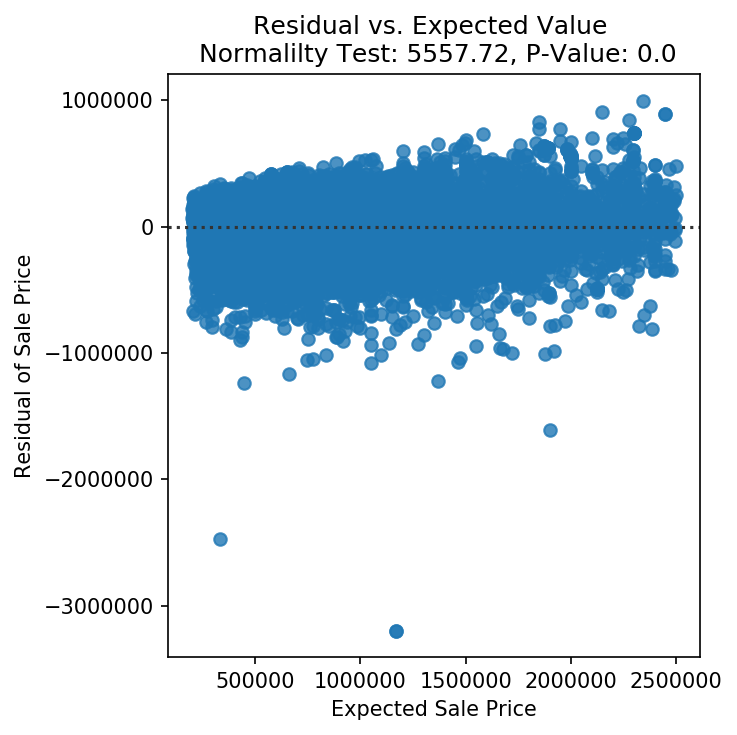

In [4]:
model_builder.residplot(base_model, dep_var)

/Users/flatironschool/opt/anaconda3/envs/linreg-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


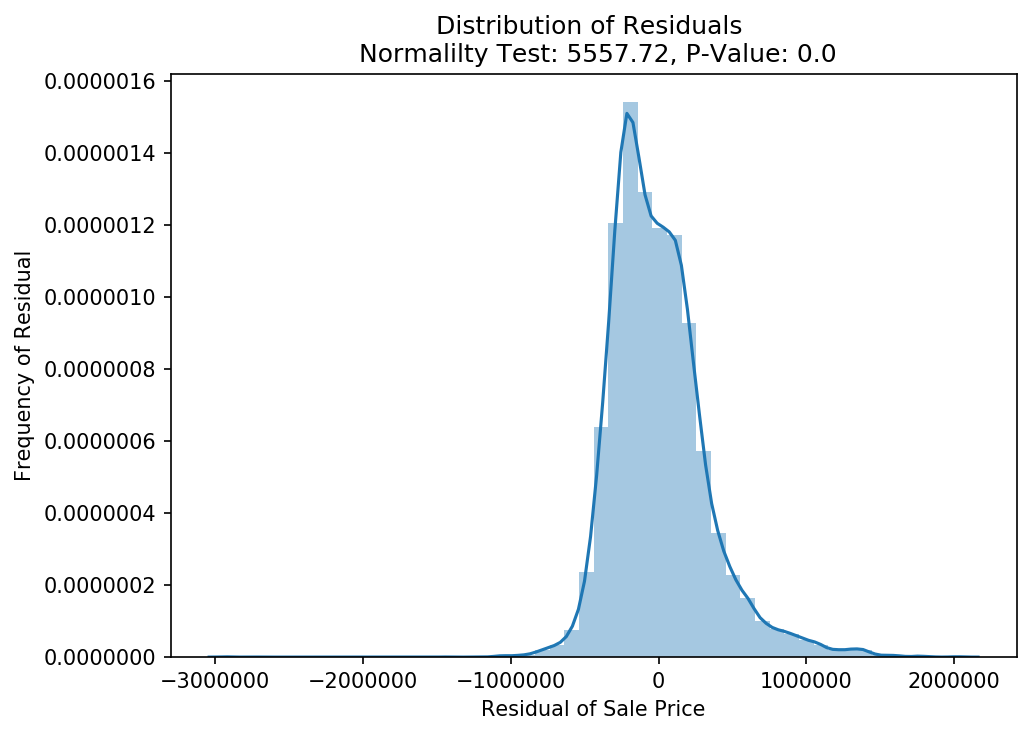

In [5]:
model_builder.residdistplot(base_model)

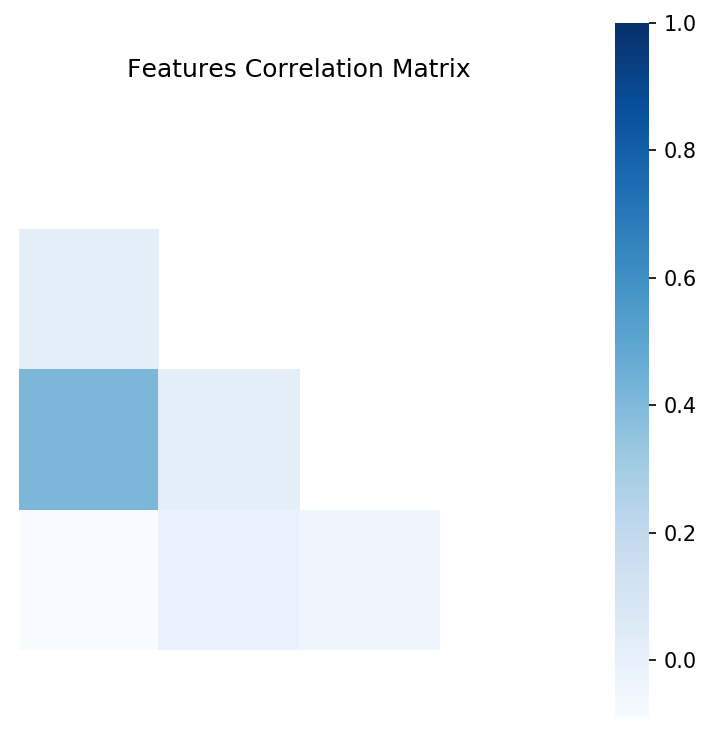

In [6]:
model_builder.corrmatrixplot(base_features)

## Choosing continuous and categorical variables and combining data

We chose variables depending on weather or not they would fit into our function. We avoided choosing multiple variables that give the same information. We isolated the big dataframe for continuouse variables and created indivual variables for each category in the category columns by using OneHotEncoder from SKLearn. We then combined all these dataframes together.


## Performing Linear Regression

We used OLS from statsmodel to do linear regression with our dependent variable of SalesPrice and our chosen independent variables in the big dataframe. We obtained a summary of this information and found a R-squared value after analyzing the data.  

## Analyzing Data

We parsed through all the p-values and flagged any variable that had a had a p-value higher than 0.05. We also looked at corellations between all the variables and deleted one variable if the colinearity between them was greater than 0.8.

In [7]:
model, dep_var, features = model_builder.model(con_var = ["SqFtLot", "YrBuilt", "Bedrooms", "BathHalfCount", "Bath3qtrCount", 
                                            "SqFtDeck", "BathFullCount", "SqFtTotBasement", "SqFtGarageAttached", 
                                            "NbrLivingUnits", "Stories", "SqFtOpenPorch", "SqFtEnclosedPorch", 
                                            "WfntFootage", "BrickStone", "FpSingleStory", "FpMultiStory", 
                                            "FpFreestanding", "FpAdditional",], 
                                             cat_var = ["Area","InadequateParking", "BldgGrade", "SaleReason", "PropertyType", 
                                            "PrincipalUse", "PropertyClass", "Condition", "PresentUse", "LevyCode", 
                                            "HBUAsIfVacant", "HBUAsImproved", "MtRainier", "Olympics", "Cascades", 
                                            "Territorial", "SeattleSkyline", "PugetSound", "LakeWashington", 
                                            "LakeSammamish", "SmallLakeRiverCreek", "OtherView", "Contamination", 
                                            "CoalMineHazard", "CriticalDrainage", "ErosionHazard", "LandfillBuffer", 
                                            "HundredYrFloodPlain", "SeismicHazard", "LandslideHazard", 
                                            "SteepSlopeHazard", "WaterProblems", "OtherProblems", "PlatType", 
                                            "DaylightBasement", "HeatSystem", "HeatSource", "ZipCode"])

updated model summary
Features with p-values greater than 0.05: 
          
374

          
    Lost Features from corellation: 
28
variables with highest and lowest coefficients

          
          
const                 752010.870293
HeatSource_2.0        594597.764306
HeatSource_3.0        511751.232934
HeatSource_1.0        377506.042888
SqFtTotLiving         101833.182642
Condition_4.0          62056.350295
Condition_3.0          57206.438074
Condition_5.0          53759.114071
HeatSource_5.0         51768.493150
BldgGrade_10.0         50770.041902
Area_34                46521.520399
HeatSource_7.0         45232.735032
BldgGrade_9.0          43967.692996
Area_33                43635.390074
BldgGrade_11.0         41253.292145
HeatSource_6.0         39843.118004
Area_46                38648.887179
Area_43                37593.054598
Area_92                33654.460742
Area_13                30397.796590
Area_11                29558.962154
LevyCode_0330          29015.673324
Area_1

## Displaying Results

We chose four graphs to display our results. The first is a q-q plot which allows us to see a distribution of our residual terms. Our data is not linear on the q-q plot. The Normal Test tests wheater or not the data is normally distributed. If the p-value is significant like our data, it says the data is not normally distributed. The distribution of residuals is another way to see if our data is normally distribuited. The heatmap shows the corelation between variables.

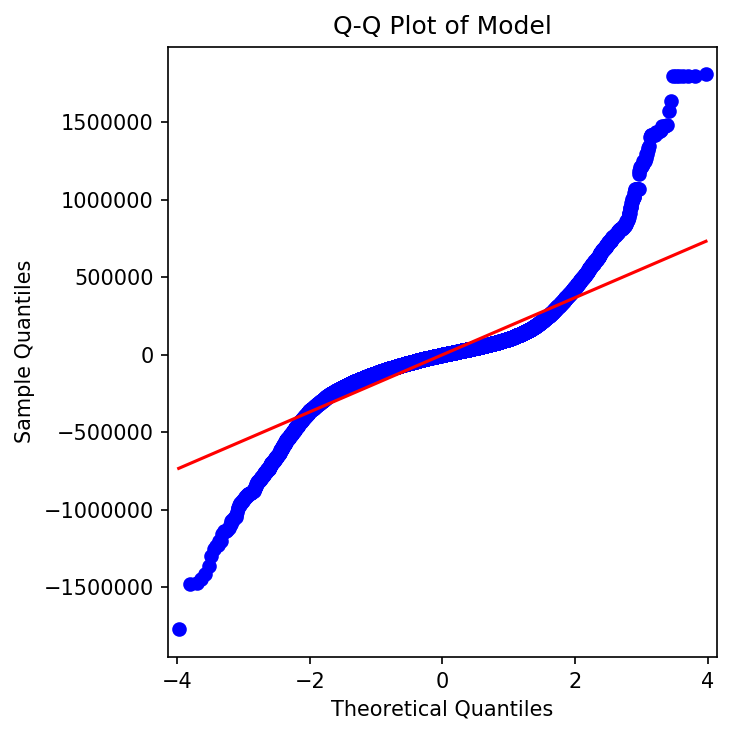

In [8]:
model_builder.qqplot(model)

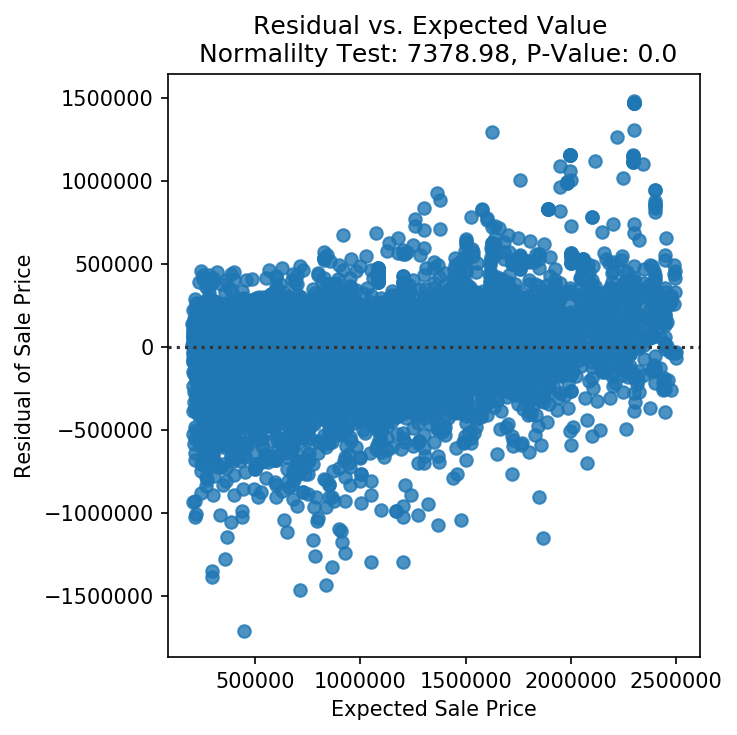

In [9]:
model_builder.residplot(model, dep_var)

/Users/flatironschool/opt/anaconda3/envs/linreg-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


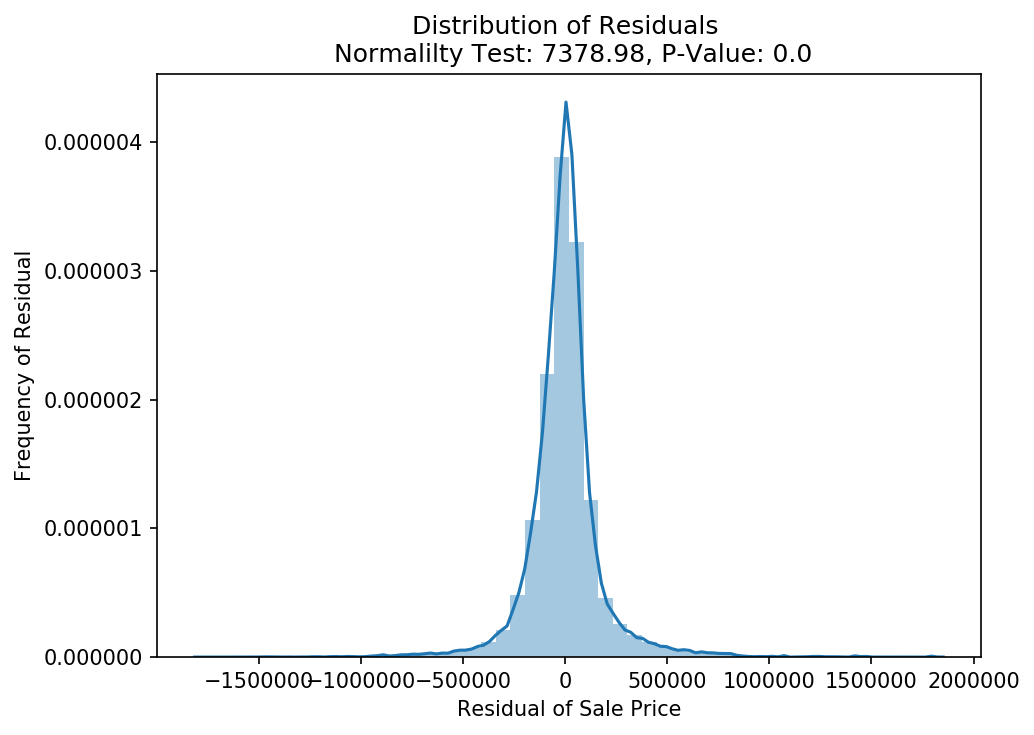

In [10]:
model_builder.residdistplot(model)

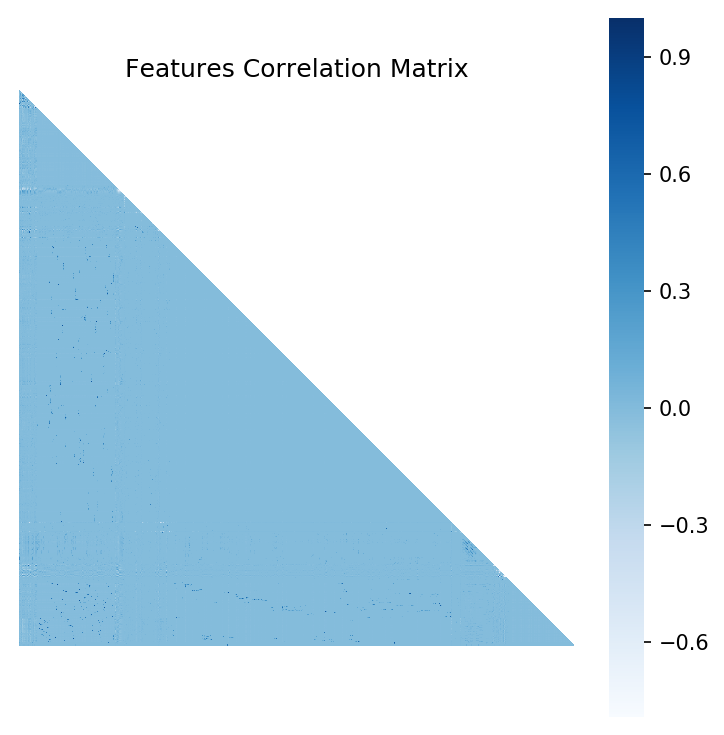

In [11]:
model_builder.corrmatrixplot(features)

## Results

Looking at our data visualizations we found that all four assumptions of linear regression were not met. From our model taking into consideration our chosen variables we found an Adjusted R-squared value of 0.783.


## Conclusion and Shortcomings

By looking at our results of variables that answer our questions (first four rows of summary table) we can fail to reject all the null hypothesis since all the p-values are below 0.05. None of the asumptions of linear regression were mete so this produces some flaw in our data, but by nature housing data is not linear so trying to fit it to those parameter is really difficult 

## Model improvements
* Detailed data validation
* Outlier detection and handling
* Correct for normal error distribution
* Feature engineering
* Explore other modeling techniques (for non-linear features)


## Areas of interest for further exploration
* Make a model for each unique area or zip code
* Why does heating create such an impact